In [1]:
import numpy as np
import sympy as sp
from ipywidgets import interactive
import matplotlib.pyplot as plt
%matplotlib inline

**Интерполяция** - это метод нахождения новых точек данных на основе диапазона дискретного набора известных точек данных.

**Интерполяция** – это замена исходной функции $f(x)$ функцией $\varphi(x)$ так, чтобы $\varphi(x)$ точно проходила через точки исходной функции $f(x)$.

**Полиномиальная интерполяция** - это интерполяция заданного набора данных полиномом наименьшей возможной степени, проходящим через точки набора данных.

### Метод подбора коэффициентов

In [2]:
# Вывести формулу
def get_polyfunc_title(koefs):
    s_koefs = ''.join([f'+{koefs[i]}x^{len(koefs)-i-1}' if koefs[i]>0 
                       else f'{koefs[i]}x^{len(koefs)-i-1}' if koefs[i]<0 
                       else ''
                       for i in range(len(koefs))])
    
    expr = s_koefs.replace('x^0', '') \
                  .replace('+', ' + ') \
                  .replace('-', ' - ') \
                  .replace('x^1', 'x') \
                  .replace(' 1x', ' x')

    if expr[:3]==' + ':
        expr = expr[3:]

    return '$f(x) = ' + expr + '$'

In [3]:
# Проверить формулу
def check(f, x, y):
    check = False not in [f(x[i])==y[i] for i in range(len(x))]
    if not check:
        print('Пока не получилось')
    else:
        print('Ура! Получилось!')

```Python
def linear(a, b):
    plt.figure()
    plt.axhline(0, color='black') # оси выходият из нуля координат
    plt.axvline(0, color='black')

    x, y = [x for x, y in points], [y for x, y in points]
    plt.scatter(x, y, c='r')
    
    if a!=0:
        f = lambda x: a * x + b
        
        check(f, x, y)
            
        x = np.linspace(-10, 10, num=1000)
        plt.plot(x, a * x + b)
        
        
    plt.ylim(-20, 20)
    plt.xlim(-5, 5)
    
    plt.title(get_polyfunc_title([a,b]))
    
    plt.show()
```

In [4]:
# Построить график
def parabola(a, b, c, d):
    plt.figure()
    plt.axhline(0, color='black') # оси выходият из нуля координат
    plt.axvline(0, color='black')

    x, y = [x for x, y in points], [y for x, y in points]
    plt.scatter(x, y, c='r')
    
    if a!=0:
        f = lambda x: a * x**3 + b * x**2 + c * x + d
        
        check(f, x, y)
            
        x = np.linspace(-5, 5, num=1000)
        plt.plot(x, a * x**3 + b * x**2 + c * x + d)
        
        
    plt.ylim(-20, 20)
    plt.xlim(-5, 5)
    
    plt.title(get_polyfunc_title([a,b,c,d]))
    
    plt.show();

In [5]:
points = [[-4, 14],
          [-3, -3],
          [-2, -10],
          [-1, -10],
          [-0.5, -8.3125],
          [0, -6],
          [0.5, -3.4375],
          [1, -1],
          [2, 2],
          [3, 0],
          [4, -10]]

interactive_plot = interactive(parabola, a=(-10, 10, 0.5), b=(-10, 10, 0.5), c=(-10, 10, 0.5), d=(-10, 10, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '300px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='a', max=10.0, min=-10.0, step=0.5), FloatSlider(valu…

---

Через $n$ точек гарантированно можно провести полином $n-1$ степени

### Аналитическое решение

In [6]:
x, a3, a2, a1, a0 = sp.symbols('x, a3, a2, a1, a0')

In [7]:
f = a3*x**3 + a2*x**2 + a1*x + a0
f

a0 + a1*x + a2*x**2 + a3*x**3

Возьмем четыре точки:
* $ (-4, 14) $
* $ (-3, -3) $
* $ (-2, -10) $
* $ (-1, -10) $

In [8]:
eq1 = f.subs(x, -4) - 14
print(eq1)
eq2 = f.subs(x, -3) + 3
print(eq2)
eq3 = f.subs(x, -2) + 10
print(eq3)
eq4 = f.subs(x, -1) + 10
print(eq4)

a0 - 4*a1 + 16*a2 - 64*a3 - 14
a0 - 3*a1 + 9*a2 - 27*a3 + 3
a0 - 2*a1 + 4*a2 - 8*a3 + 10
a0 - a1 + a2 - a3 + 10


Решаем СЛАУ

In [9]:
coef = sp.linsolve([eq1, eq2, eq3, eq4], [a3, a2, a1, a0])
coef

{(-1/2, 1/2, 5, -6)}

In [10]:
f = f.subs({a3:coef.args[0][0], a2:coef.args[0][1], a1:coef.args[0][2], a0:coef.args[0][3]})
f

-x**3/2 + x**2/2 + 5*x - 6

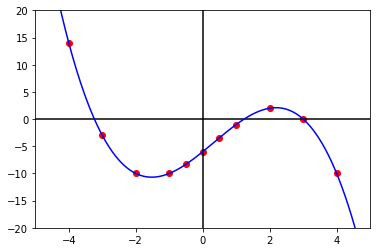

In [11]:
points_X = [-4, -3, -2, -1, -0.5, 0, 0.5, 1, 2, 3, 4]
points_Y = [14, -3, -10, -10, -8.3125, -6, -3.4375, -1, 2, 0, -10]

X = np.arange(-5, 5, 0.01)
Y = [f.subs(x, i).evalf() for i in X]

plt.figure()
plt.axhline(0, color='black') # оси выходият из нуля координат
plt.axvline(0, color='black')
plt.ylim(-20, 20)
plt.xlim(-5, 5)

plt.scatter(points_X, points_Y, c='r')
plt.plot(X, Y, 'b')
plt.show();

In [12]:
roots = [root.evalf() for root in sp.solve(f)]
roots

[3.00000000000000, 1.23606797749979, -3.23606797749979]

In [13]:
sp.solve_univariate_inequality(f>0, x)

((x < 3) & (-1 + sqrt(5) < x)) | ((-oo < x) & (x < -sqrt(5) - 1))

---
---
---